In [158]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [159]:
warnings.filterwarnings('ignore')

In [160]:
data = pd.read_csv("/content/BRITANNIA.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
1,2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2,2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
3,2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
4,2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


In [161]:
data.drop(['Date'], axis=1, inplace=True)

In [162]:
print(data.head())
print(data.shape)
print(data.columns)

      Symbol Series  Prev Close   Open    High    Low   Last   Close    VWAP  \
0  BRITANNIA     EQ      703.25  705.0  759.50  705.0  758.0  756.90  741.01   
1  BRITANNIA     EQ      756.90  710.0  770.00  710.0  740.0  754.55  742.52   
2  BRITANNIA     EQ      754.55  755.0  759.00  705.0  740.0  735.30  739.92   
3  BRITANNIA     EQ      735.30  740.0  794.15  740.0  770.0  785.65  788.83   
4  BRITANNIA     EQ      785.65  808.0  848.50  798.0  848.5  848.50  827.53   

   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0    7512  5.566488e+11     NaN                 NaN          NaN  
1    8135  6.040391e+11     NaN                 NaN          NaN  
2    6095  4.509784e+11     NaN                 NaN          NaN  
3   19697  1.553756e+12     NaN                 NaN          NaN  
4   33107  2.739708e+12     NaN                 NaN          NaN  
(5305, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 

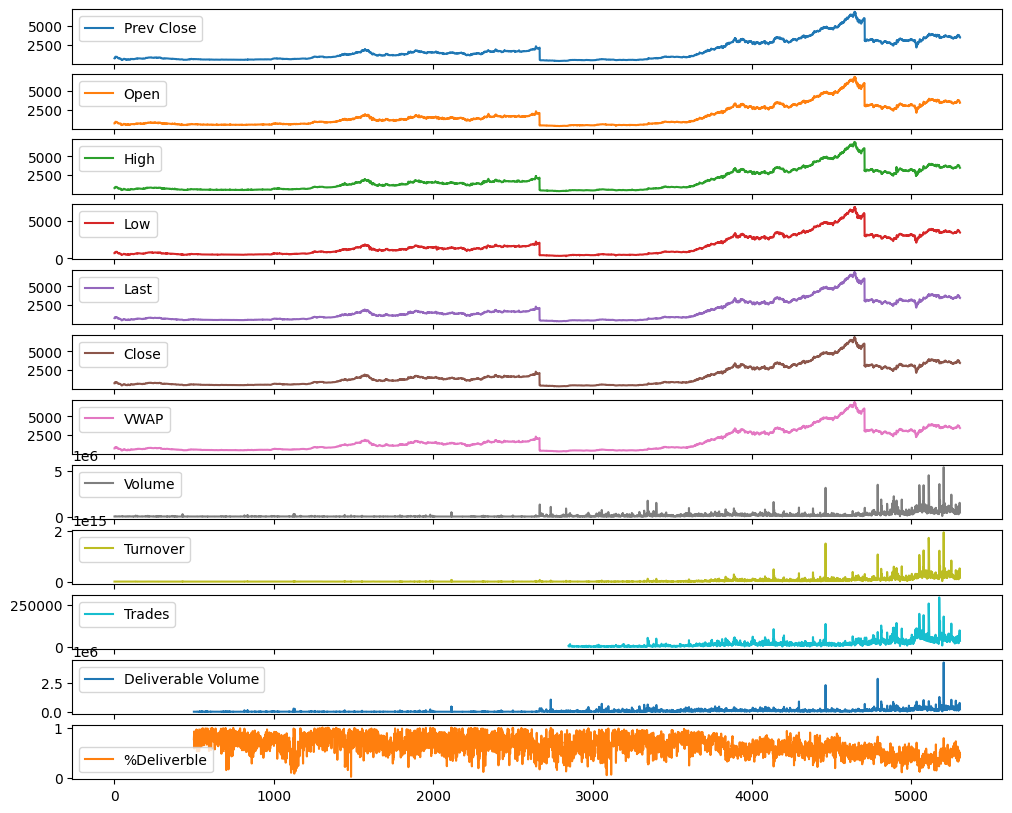

Symbol                   1
Series                   1
Prev Close            4919
Open                  3522
High                  3645
Low                   3756
Last                  3554
Close                 4919
VWAP                  5212
Volume                5038
Turnover              5305
Trades                2371
Deliverable Volume    4511
%Deliverble           3390
dtype: int64

In [163]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [164]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
1,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
3,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
4,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


         Symbol Series  Prev Close     Open     High     Low    Last    Close  \
0     BRITANNIA     EQ      703.25   705.00   759.50   705.0   758.0   756.90   
1     BRITANNIA     EQ      756.90   710.00   770.00   710.0   740.0   754.55   
2     BRITANNIA     EQ      754.55   755.00   759.00   705.0   740.0   735.30   
3     BRITANNIA     EQ      735.30   740.00   794.15   740.0   770.0   785.65   
4     BRITANNIA     EQ      785.65   808.00   848.50   798.0   848.5   848.50   
...         ...    ...         ...      ...      ...     ...     ...      ...   
5300  BRITANNIA     EQ     3650.30  3661.10  3662.00  3531.0  3546.0  3539.20   
5301  BRITANNIA     EQ     3539.20  3572.70  3574.60  3517.0  3546.0  3541.20   
5302  BRITANNIA     EQ     3541.20  3488.00  3527.00  3469.0  3470.0  3478.75   
5303  BRITANNIA     EQ     3478.75  3496.75  3505.90  3447.0  3464.0  3468.90   
5304  BRITANNIA     EQ     3468.90  3460.00  3468.35  3437.0  3444.8  3449.00   

         VWAP   Volume     

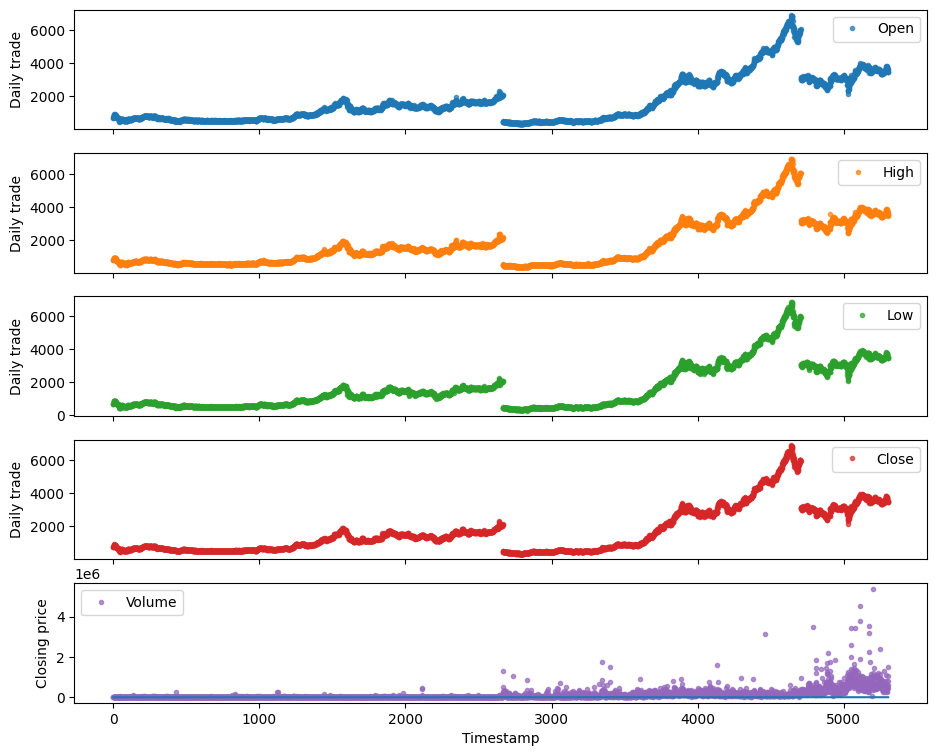

In [165]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [166]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2849
Deliverable Volume     509
%Deliverble            509
dtype: int64

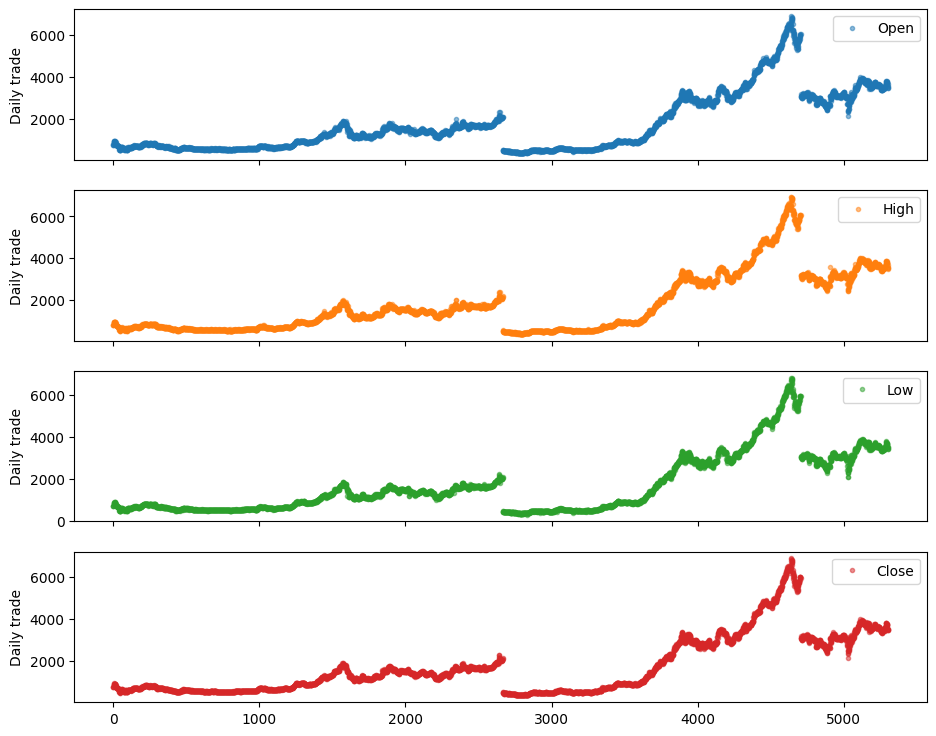

In [167]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

         Symbol Series  Prev Close     Open     High     Low    Last    Close  \
0     BRITANNIA     EQ      703.25   705.00   759.50   705.0   758.0   756.90   
1     BRITANNIA     EQ      756.90   710.00   770.00   710.0   740.0   754.55   
2     BRITANNIA     EQ      754.55   755.00   759.00   705.0   740.0   735.30   
3     BRITANNIA     EQ      735.30   740.00   794.15   740.0   770.0   785.65   
4     BRITANNIA     EQ      785.65   808.00   848.50   798.0   848.5   848.50   
...         ...    ...         ...      ...      ...     ...     ...      ...   
5300  BRITANNIA     EQ     3650.30  3661.10  3662.00  3531.0  3546.0  3539.20   
5301  BRITANNIA     EQ     3539.20  3572.70  3574.60  3517.0  3546.0  3541.20   
5302  BRITANNIA     EQ     3541.20  3488.00  3527.00  3469.0  3470.0  3478.75   
5303  BRITANNIA     EQ     3478.75  3496.75  3505.90  3447.0  3464.0  3468.90   
5304  BRITANNIA     EQ     3468.90  3460.00  3468.35  3437.0  3444.8  3449.00   

         VWAP   Volume     

,count,mean,std,min,25%,50%,75%,max
Prev Close,5305.0,1.687975e+03,1.364835e+03,3.363500e+02,5.918000e+02,1.230150e+03,2.743700e+03,6.900150e+03
Open,5305.0,1.690173e+03,1.367096e+03,3.400000e+02,5.945000e+02,1.230000e+03,2.741050e+03,6.918000e+03
High,5305.0,1.713527e+03,1.379849e+03,3.477000e+02,6.039000e+02,1.259000e+03,2.778400e+03,6.934350e+03
Low,5305.0,1.665679e+03,1.350728e+03,2.952000e+02,5.802000e+02,1.203350e+03,2.701100e+03,6.831700e+03
Last,5305.0,1.688601e+03,1.365080e+03,3.369500e+02,5.925000e+02,1.230000e+03,2.747000e+03,6.898000e+03
Close,5305.0,1.688492e+03,1.364982e+03,3.363500e+02,5.918000e+02,1.230300e+03,2.743900e+03,6.900150e+03
VWAP,5305.0,1.689631e+03,1.365361e+03,3.398600e+02,5.921000e+02,1.232610e+03,2.743300e+03,6.886460e+03
Volume,5305.0,1.220883e+05,2.668956e+05,8.400000e+01,4.284000e+03,2.002900e+04,1.347500e+05,5.383773e+06
Turnover,5305.0,3.531071e+13,9.119291e+13,9.614630e+09,3.694440e+11,1.347110e+12,3.634675e+13,1.954734e+15
Trades,2456.0,1.924363e+04,2.242058e+04,2.700000e+01,4.496750e+03,1.323100e+04,2.492075e+04,2.942640e+05


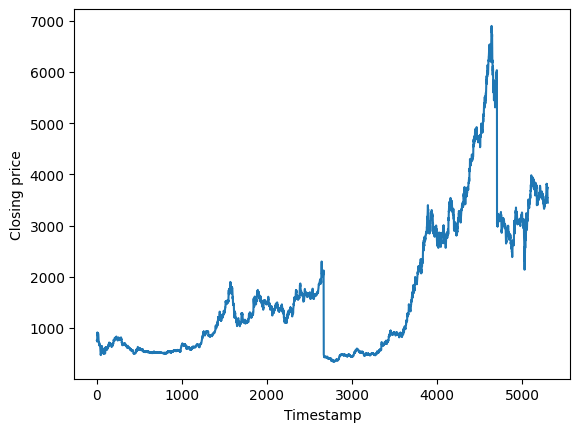

In [168]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [169]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4162
1041


In [170]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 13ms/step - loss: 0.0217 - mse: 0.0217 - mae: 0.0918 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0382
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0311 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0281
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0262 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0259
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0239 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0241
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0228 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0229
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0217 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0216
Epoch 7/100
66/66 [==

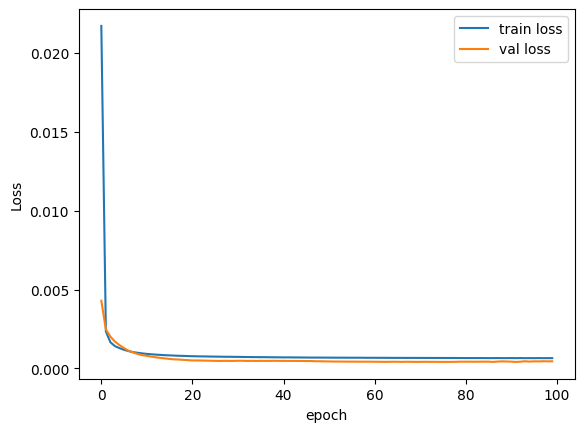

In [171]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

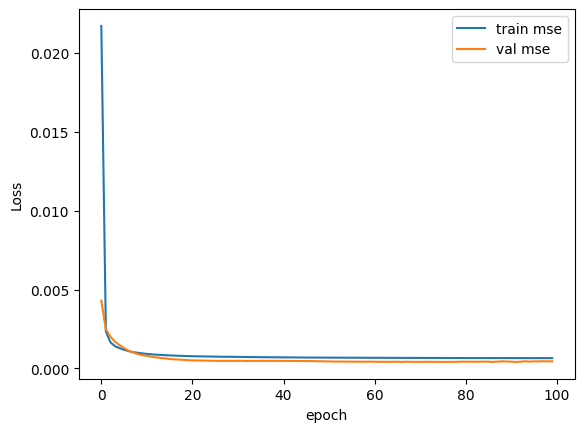

In [172]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

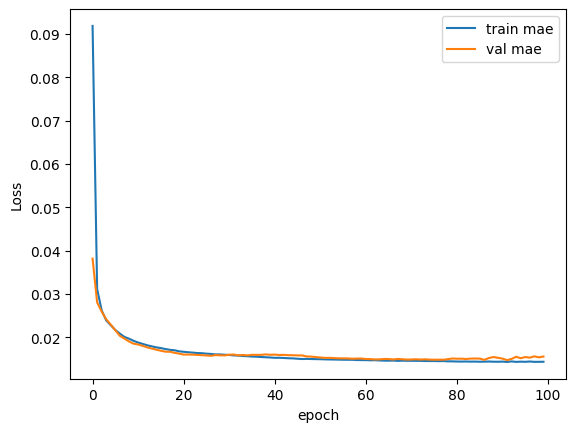

In [173]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_13 (LSTM)              (None, 32)                6272      
                                                                 
 dense_30 (Dense)            (None, 64)                2112      
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 activation_18 (Activation)  (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 activation_19 (Activation)  (None, 64)               

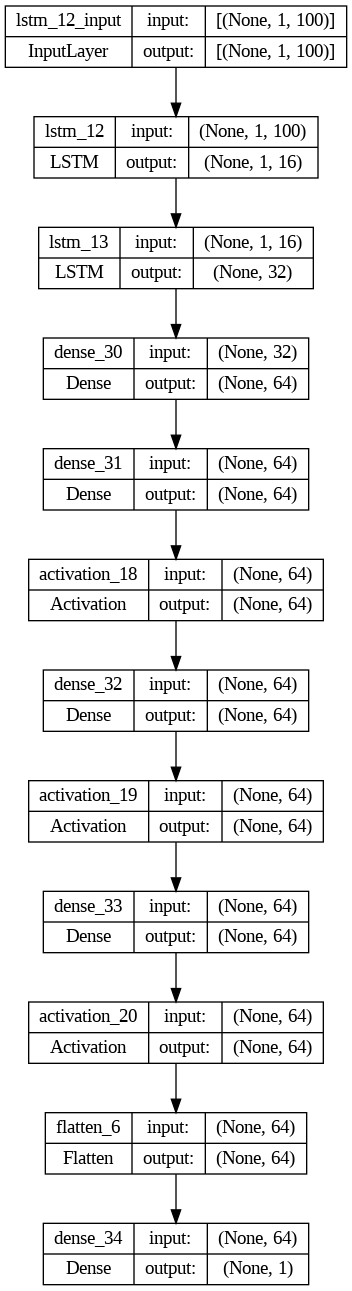

In [174]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [175]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 4.5429e-04 - mse: 4.5429e-04 - mae: 0.0156


[0.00045428835437633097, 0.00045428835437633097, 0.015553674660623074]

In [176]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.993250
R2 Score: 0.992323
Max Error: 0.107638


33/33 [==============================] - 0s 1ms/step


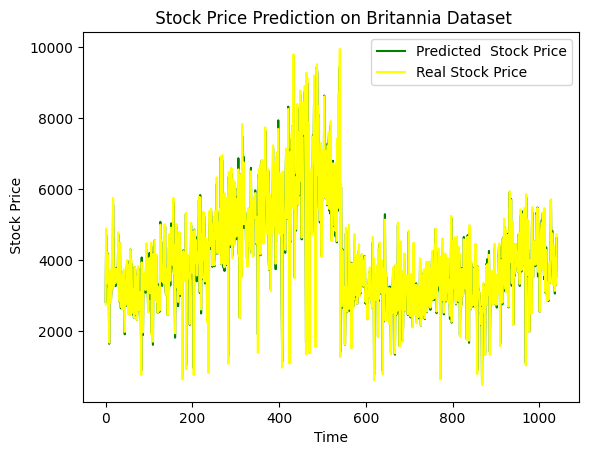

In [177]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on Britannia Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

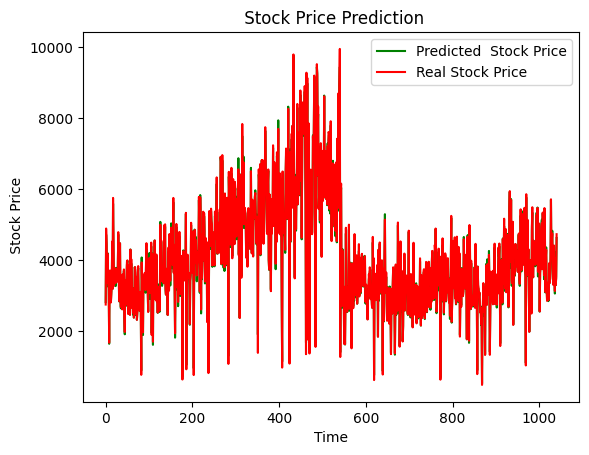

In [178]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [179]:
predicted

array([[2825.9932],
       [4725.609 ],
       [4431.03  ],
       ...,
       [3301.0999],
       [3551.234 ],
       [4631.3184]], dtype=float32)

In [180]:
test_label

array([[2756.80215621],
       [4898.20556073],
       [4472.62646771],
       ...,
       [3305.48027172],
       [3492.64077255],
       [4737.86881663]])

In [181]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0      2756.802156      2825.993164
1      4898.205561      4725.608887
2      4472.626468      4431.029785
3      3380.072752      3386.148193
4      4189.162577      4208.740234
...            ...              ...
1036   3138.034511      3065.986816
1037   4068.021425      4226.764648
1038   3305.480272      3301.099854
1039   3492.640773      3551.233887
1040   4737.868817      4631.318359

[1041 rows x 2 columns]


In [182]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 2756.8021562105746 |  2825.9931640625   |
|  1   | 4898.205560733853  |  4725.60888671875  |
|  2   | 4472.626467710372  |  4431.02978515625  |
|  3   | 3380.0727518332683 | 3386.148193359375  |
|  4   | 4189.162577377602  |   4208.740234375   |
|  5   | 3753.866745399075  |  3713.10009765625  |
|  6   |  3293.21066969353  |  3261.73388671875  |
|  7   | 3231.0050430714814 | 3377.872802734375  |
|  8   | 1681.3245851756765 | 1651.005126953125  |
|  9   | 3483.154080717489  | 3457.159423828125  |
|  10  | 3717.8403736440337 |  3687.51318359375  |
|  11  | 3027.294694767442  | 2953.387451171875  |
|  12  | 2814.606696518078  |  2839.54931640625  |
|  13  | 3077.895900643852  | 3070.257568359375  |
|  14  | 3336.9025483057967 |   3334.09765625    |
|  15  | 4533.790755633207  |  4451.71435546875  |
|  16  | 3202.0806689981123 |  

In [183]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_13 (LSTM)              (None, 32)                6272      
                                                                 
 dense_30 (Dense)            (None, 64)                2112      
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 activation_18 (Activation)  (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 activation_19 (Activation)  (None, 64)               

In [184]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))